# Work2

- Luis
- Álvaro
- Diego

## 1. In a markdown cell of the Visual Code, explain the idea of sample splitting to evaluate the performance of prediction as presented in class. Use equations in your explanation.

When we try to ger the better prediction model, we can split the sample. By doing this, we will have two datasets randomly splitted: a training sample and a testing sample. Usually the 75% of the sample is used for training and the reimaing data is used for testing.

We take the original model as: 
$$ Y = \beta_1 X_1 + \beta_2 X_2 $$ 
An a functional model of the regression as:
$$f(X) = \beta_1 X_1 + \beta_2 X_2 $$
 
We split it as:
$$ Y = [ Y^{train} \   Y^{test}] $$ 
$$ X_1 = [X_1^{train} \   X_1^{test}] $$
$$ X_2 = [X_2^{train} \   X_2^{test}] $$ 

In order to estimate the prediction rule, we proceed to regress:  $ Y^{train} $ ~ $ X_1^{train},  X_2^{train}$ to obtain the estimated the parameters of prediction.
$$ \hat{f}(X^{train}) = \hat\beta_1 X_1^{train} + \hat\beta_2 X_2^{train} = \hat{Y}^{train}$$

Next, we will use the testing dataset to compare the predicted outcome, $\hat{Y}^{test}$ as follows:
$$ \hat{Y}^{test} = \hat\beta_1 X_1^{test} + \hat\beta_2 X_2^{test} $$

Finally, to check the power of our prediction model, we need to obtain the Mean Squared Error from testing. As lower the MSE is, the better.
$$MSE_{test} = \frac{1}{n} \sum [Y^{test} - \hat{Y}^{test}]^2 $$


## 2. Explain what cross-validation is. Use figures, Equations, code and your intuition to explain this concept and how we used it when choosing the optimal lambda from a lasso regression.

The cross-validation method is used to compare the outcomes from different candidates to a value of interest using different portions of the data. In this case, we use the method to obtain the optimal lambda ($\lambda$) that gets the better estimated parameters of an OLS regression.

First, we present a grid of potential $\lambda$ candidates choosen arbitrarily, we will use 5:
$$ \lambda \in [ 0.1; 0.2; 0.25; 0.5 ;0.9 ] $$

Then, we continue splitting the dataset in an arbitrary number of folds, each one has the same number of elements. We will split our dataset in 10 folds, containing 10 elements each fold.

$$ K = [ \begin{matrix} 
K_1&K_2&K_3&K_4&K_5&...&K_{10}]
\end{matrix} $$

The main porpouse of this method is to evaluate every lambda and choose the one that better fits our condition. We want the $\lambda$ that minimizes the MSE for our Lasso-OLS regression, this assure us the best predictive model aviable using the least number of parameters, obtaining a parsimonious model. First, we evaluate $\lambda_1= 0.1$, using every folds to fit the model except $K_j$. In this first step, $j=1$, so we will use $K_{2-10}$ (90 elements). 
$$ \min_{b \in R^p} (Y_i - b'X_i)^2 + \lambda_1 \sum_{w=1}^{p} b_w $$

Then, we obtain the estimated $b$ that will be tested using the $K_1$ fold.
$$\hat{b}_{K_{2-10}} X_{K_1} = \hat{Y}_{K_1}$$ 

Then, we repeat the same process for $K_2$ to $K_{10}$. Finally, collect all $\hat{Y}_{K_{1-10}}$ to calculate the MSE of the model using $\lambda_1 = 0.1$ (remember that n = number of total observations):

$$MSE_{\lambda =0.1} = \frac{1}{n} \sum [Y - \hat{Y}_{K_{1-10}}]^2$$

Repeat the same process for each $\lambda$, and then compare every $MSE$ value. The $\lambda$ that returns the lower Mean Square Error, is the optimal lambda that let us get the best predictive model for our dataset.

## 3. Replicate the problem

In [1]:
#load the dataset
load("../../data/wage2015_subsample_inference.Rdata")
df<-as.data.frame(data)
df
dim(df)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
15,11.057692,2.403126,0,0,1,0,0,0,0,0,0,1,18.0,3.2400,5.832000,10.49760000,6260,19,770,4
18,13.942308,2.634928,1,0,0,0,0,1,0,0,0,1,25.0,6.2500,15.625000,39.06250000,420,1,6990,12
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
43,19.230769,2.956512,1,0,1,0,0,0,0,0,0,1,42.0,17.6400,74.088000,311.16960000,5120,17,7280,14
44,19.230769,2.956512,0,0,1,0,0,0,0,0,0,1,37.0,13.6900,50.653000,187.41610000,5240,17,5680,9
47,12.000000,2.484907,1,0,1,0,0,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,4040,13,8590,19


[1] 5150   20

In [4]:
#select the subset focused on people who did not go to college 
library(dplyr)

subset <- df %>% filter(shs==1 | hsg==1)
subset
dim(subset)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
15,11.057692,2.403126,0,0,1,0,0,0,0,0,0,1,18,3.24,5.832,10.4976,6260,19,770,4
43,19.230769,2.956512,1,0,1,0,0,0,0,0,0,1,42,17.64,74.088,311.1696,5120,17,7280,14
44,19.230769,2.956512,0,0,1,0,0,0,0,0,0,1,37,13.69,50.653,187.4161,5240,17,5680,9
47,12.000000,2.484907,1,0,1,0,0,0,0,0,0,1,31,9.61,29.791,92.3521,4040,13,8590,19
73,17.307692,2.851151,1,0,1,0,0,0,0,0,0,1,7,0.49,0.343,0.2401,4020,13,8270,18
77,12.019231,2.486508,0,0,1,0,0,0,0,0,0,1,30,9.00,27.000,81.0000,4220,14,8270,18
113,27.884615,3.328075,0,0,1,0,0,0,0,0,0,1,16,2.56,4.096,6.5536,6355,19,770,4
115,21.600000,3.072693,0,0,1,0,0,0,0,0,0,1,27,7.29,19.683,53.1441,6320,19,770,4
128,19.230769,2.956512,0,0,1,0,0,0,0,0,0,1,6,0.36,0.216,0.1296,7000,20,4690,9


[1] 1376   20

In [7]:
#table for means at gender
install.packages("xtable")
library(xtable)

Z <- data[which(colnames(data) %in% c("lwage","sex","shs", "hsg","ne","mw","so","we","exp1"))]

data_female <- data[data$sex==1,]
Z_female <- data_female[which(colnames(data) %in% c("lwage","sex","shs", "hsg","ne","mw","so","we","exp1"))]


data_male <- data[data$sex==0,]
Z_male <- data_male[which(colnames(data) %in% c("lwage","sex","shs", "hsg","ne","mw","so","we","exp1"))]

table <- matrix(0, 9, 3)
table[1:9,1]   <- as.numeric(lapply(Z,mean))
table[1:9,2]   <- as.numeric(lapply(Z_male,mean))
table[1:9,3]   <- as.numeric(lapply(Z_female,mean))
rownames(table) <- c("Log Wage","Sex","Less then High School","High School Graduate","Northeast","Midwest","South","West","Experience")
colnames(table) <- c("All","Men","Women")
tab<- xtable(table, digits = 4)
tab

Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmp0uBhV9\downloaded_packages


,All,Men,Women
,<dbl>,<dbl>,<dbl>
Log Wage,2.97078670,2.98782963,2.94948490
Sex,0.44446602,0.00000000,1.00000000
Less then High School,0.02330097,0.03180706,0.01266929
High School Graduate,0.24388350,0.29430269,0.18086501
Northeast,0.25961165,0.25900035,0.26037571
Midwest,0.29650485,0.29814750,0.29445173
South,0.21611650,0.22090178,0.21013543
West,0.22776699,0.22195037,0.23503713
Experience,13.76058252,13.78399161,13.73132372


### Graphs

In [8]:
subset$region <- as.factor(ifelse(subset$ne ==1, 'Northeast',
                     ifelse(subset$so ==1, 'South', 
                     ifelse(subset$we ==1,  'Midwest',"West"))))

subset$gender <- as.factor(ifelse(subset$sex ==1, 'Female', "Male"))
   
subset$educ <- as.factor(ifelse(subset$shs ==1, 'Some Highschool', "Highschool Graduated"))
  
subset

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,⋯,exp2,exp3,exp4,occ,occ2,ind,ind2,region,gender,educ
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
15,11.057692,2.403126,0,0,1,0,0,0,0,0,⋯,3.24,5.832,10.4976,6260,19,770,4,Northeast,Male,Highschool Graduated
43,19.230769,2.956512,1,0,1,0,0,0,0,0,⋯,17.64,74.088,311.1696,5120,17,7280,14,Northeast,Female,Highschool Graduated
44,19.230769,2.956512,0,0,1,0,0,0,0,0,⋯,13.69,50.653,187.4161,5240,17,5680,9,Northeast,Male,Highschool Graduated
47,12.000000,2.484907,1,0,1,0,0,0,0,0,⋯,9.61,29.791,92.3521,4040,13,8590,19,Northeast,Female,Highschool Graduated
73,17.307692,2.851151,1,0,1,0,0,0,0,0,⋯,0.49,0.343,0.2401,4020,13,8270,18,Northeast,Female,Highschool Graduated
77,12.019231,2.486508,0,0,1,0,0,0,0,0,⋯,9.00,27.000,81.0000,4220,14,8270,18,Northeast,Male,Highschool Graduated
113,27.884615,3.328075,0,0,1,0,0,0,0,0,⋯,2.56,4.096,6.5536,6355,19,770,4,Northeast,Male,Highschool Graduated
115,21.600000,3.072693,0,0,1,0,0,0,0,0,⋯,7.29,19.683,53.1441,6320,19,770,4,Northeast,Male,Highschool Graduated
128,19.230769,2.956512,0,0,1,0,0,0,0,0,⋯,0.36,0.216,0.1296,7000,20,4690,9,Northeast,Male,Highschool Graduated


In [9]:
# Histogram

ggplot(subset, aes(x=exp1)) + geom_histogram()


ERROR: Error in ggplot(subset, aes(x = exp1)): no se pudo encontrar la función "ggplot"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


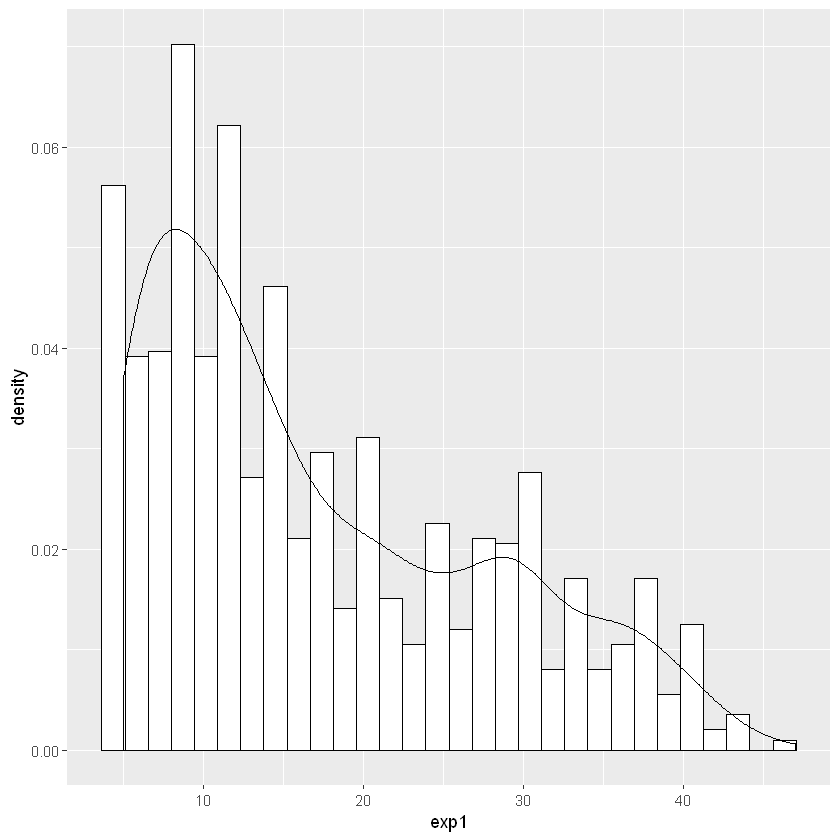

In [92]:
#Density

ggplot(subset, aes(x = exp1)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density()

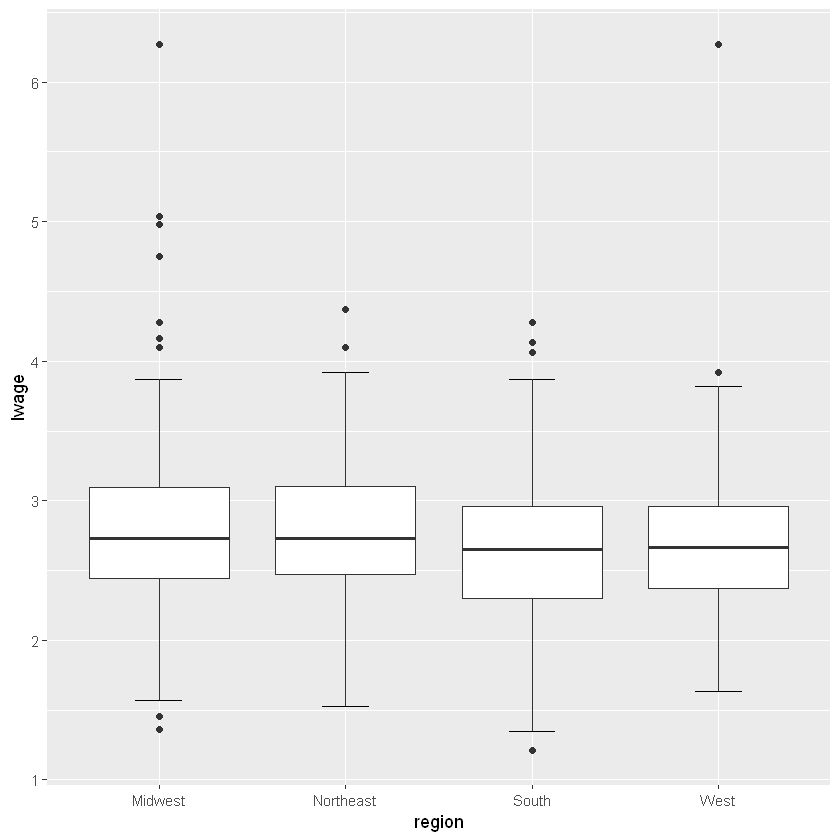

In [93]:
#boxplot

ggplot(subset, aes(x = region, y = lwage)) + 
  stat_boxplot(geom = "errorbar", # Error bars
               width = 0.25) +    # Bars width
  geom_boxplot()

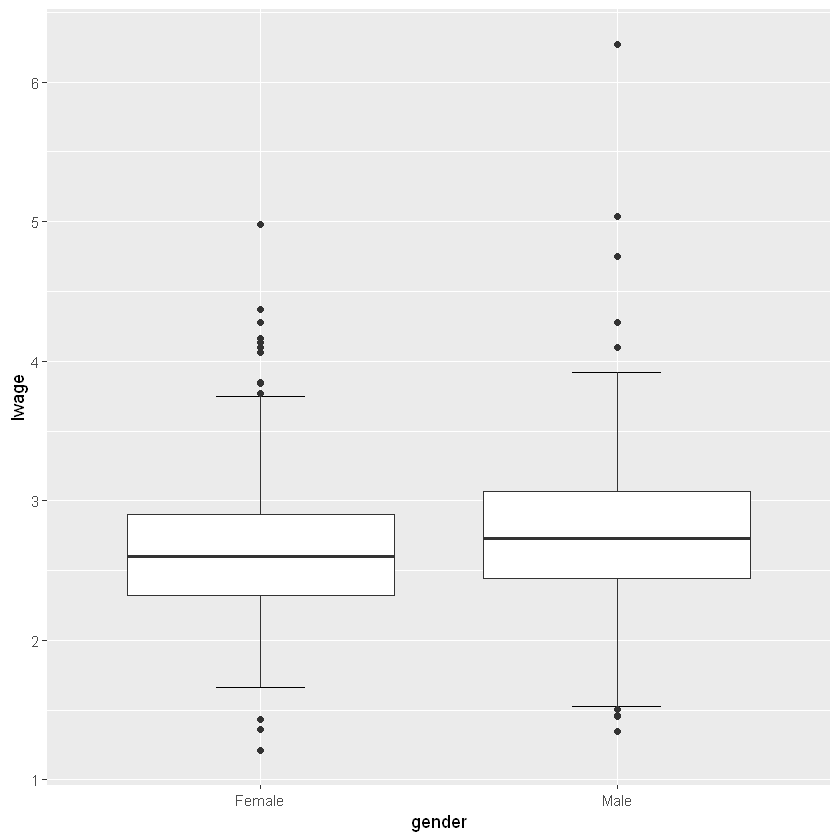

In [94]:
ggplot(subset, aes(x = gender, y = lwage)) + 
  stat_boxplot(geom = "errorbar", # Error bars
               width = 0.25) +    # Bars width
  geom_boxplot()

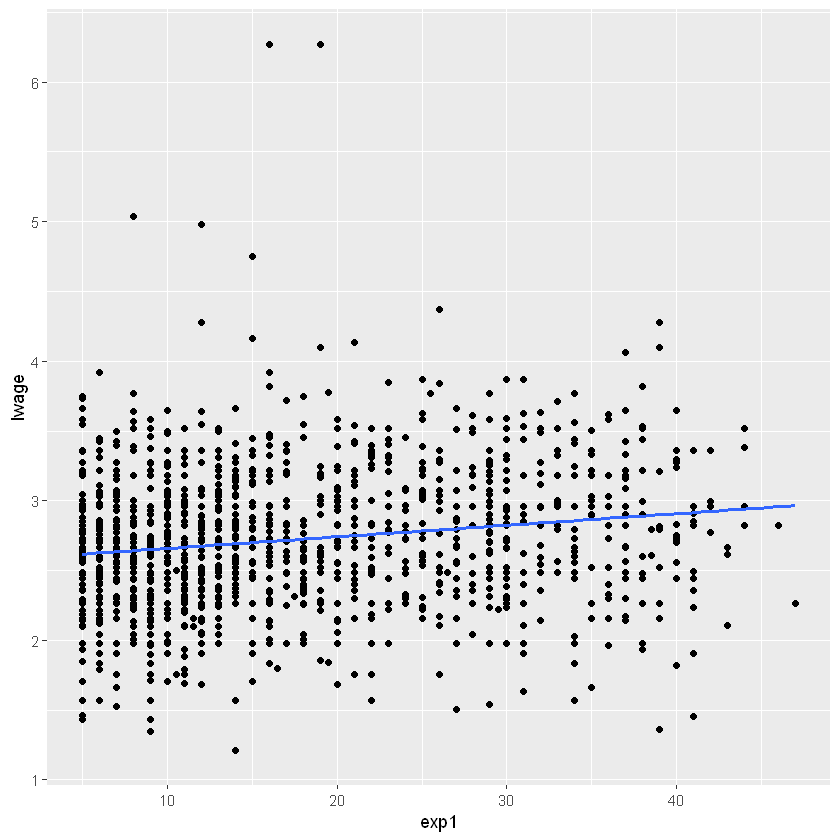

In [95]:
ggplot(subset, aes(x=exp1, y=lwage))  + 
  geom_point()+
  geom_smooth(method=lm, se=FALSE)

### Regressions

In [96]:
install.packages("lmtest")
install.packages("sandwich")

library(lmtest)
library(sandwich)



  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-38 0.9-40              TRUE

  Binaries will be installed


Warning message:
"package 'lmtest' is in use and will not be installed"


  There is a binary version available but the source version is later:
         binary source needs_compilation
sandwich  3.0-0  3.0-1             FALSE



installing the source package 'sandwich'



In [125]:
# OLS Basic model

#set the variables
basic <- lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2
basic_fit <- lm(basic, data=subset)
basic_est <- summary(basic_fit)$coef[2,1]

summary(basic_fit)


cat("Coefficient for basic regression", basic_est)

HCV.coefs.1 <- vcovHC(basic_fit, type = "HC")
control.se.1 <- sqrt(diag(HCV.coefs.1))[2] # Estimated std errors

# confidence interval
confint(basic_fit)[2,]


Call:
lm(formula = basic, data = subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5106 -0.2700 -0.0046  0.2581  3.5861 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.8330066  0.1392788  20.341  < 2e-16 ***
sex         -0.0733094  0.0314431  -2.331 0.019876 *  
exp1         0.0075742  0.0012515   6.052 1.86e-09 ***
shs         -0.0811342  0.0454977  -1.783 0.074772 .  
hsg                 NA         NA      NA       NA    
mw          -0.0431882  0.0362014  -1.193 0.233083    
so          -0.1091620  0.0358891  -3.042 0.002399 ** 
we           0.0129620  0.0395420   0.328 0.743112    
occ22       -0.1961261  0.1358850  -1.443 0.149165    
occ23       -0.0086113  0.1609663  -0.053 0.957343    
occ24        0.0005078  0.1412714   0.004 0.997132    
occ25        0.2615289  0.2791999   0.937 0.349079    
occ26       -0.3510072  0.1771869  -1.981 0.047797 *  
occ27       -0.1900342  0.2401490  -0.

Coefficient for basic regression -0.07330945

2.5 %      97.5 % 
-0.13499303 -0.01162586

In [126]:
# OLS Flexible model

#set the variables
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2
flex_fit <- lm(flex, data=subset)
flex_est <- summary(flex_fit)$coef[2,1]

summary(flex_fit)

cat("Coefficient for basic regression", flex_est)

HCV.coefs.2 <- vcovHC(flex_fit, type = "HC")
control.se.2 <- sqrt(diag(HCV.coefs.2))[2] # Estimated std errors

# confidence interval
confint(flex_fit)[2,]


Call:
lm(formula = flex, data = subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3171 -0.1914  0.0000  0.1877  2.5926 

Coefficients: (382 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    1.616e+01  9.137e+00   1.769  0.07724 . 
sex           -8.833e-02  3.833e-02  -2.305  0.02142 * 
exp1          -3.404e+00  2.197e+00  -1.549  0.12165   
exp2           3.827e+01  2.126e+01   1.800  0.07216 . 
exp3          -2.073e+01  1.277e+01  -1.623  0.10486   
exp4           6.983e+00  5.898e+00   1.184  0.23672   
shs           -6.386e-01  1.432e+00  -0.446  0.65568   
hsg                   NA         NA      NA       NA   
occ22         -2.543e+00  5.679e+00  -0.448  0.65443   
occ23         -4.076e+01  6.020e+01  -0.677  0.49861   
occ24          7.848e+00  7.482e+00   1.049  0.29450   
occ25         -5.326e+01  2.661e+01  -2.002  0.04564 * 
occ26          2.041e+01  3.789e+01   0.539  0.59029   
occ27          1.894e+0

Coefficient for basic regression -0.08832947

2.5 %      97.5 % 
-0.16355159 -0.01310734

## 4. Partialling-Out using lasso 

In [113]:

install.packages("hdm")
library(hdm)


package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmp0a1OO8\downloaded_packages


Warning message:
"package 'hdm' was built under R version 3.6.3"

In [122]:
#Case 1: Partialling-Out using lasso 1 : Matrix W = 'exp1 + shs + hsg + mw + so + we + occ2+ ind2'

flex.y <- lwage ~  exp1 + shs + hsg + mw + so + we + occ2+ ind2 # model for Y
flex.d <- sex ~ exp1 + shs + hsg + mw + so + we + occ2+ ind2 # model for D

# partialling-out the linear effect of W from Y
t.Y <- rlasso(flex.y, data=subset)$res
# partialling-out the linear effect of W from D
t.D <- rlasso(flex.d, data=subset)$res

# regression of Y on D after partialling-out the effect of W
partial.lasso.fit <- lm(t.Y~t.D)
partial.lasso.est <- summary(partial.lasso.fit)$coef[2,1]

cat("Coefficient for Sex via partialling-out using lasso", partial.lasso.est)

# standard error
HCV.coefs <- vcovHC(partial.lasso.fit, type = 'HC')
partial.lasso.se <- sqrt(diag(HCV.coefs))[2]

Coefficient for Sex via partialling-out using lasso -0.09065628

In [128]:
#Case 2: Partialling-Out using lasso 2 : Matrix W = (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2

flex.y.2 <- lwage ~  (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2 # model for Y
flex.d.2 <- sex ~ (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)^2 # model for D

# partialling-out the linear effect of W from Y
t.Y.2 <- rlasso(flex.y.2, data=subset)$res
# partialling-out the linear effect of W from D
t.D.2 <- rlasso(flex.d.2, data=subset)$res

# regression of Y on D after partialling-out the effect of W
partial.lasso.fit.2 <- lm(t.Y.2~t.D.2)
partial.lasso.est.2 <- summary(partial.lasso.fit.2)$coef[2,1]

cat("Coefficient for Sex via partialling-out using lasso", partial.lasso.est.2)

# standard error
HCV.coefs.2 <- vcovHC(partial.lasso.fit.2, type = 'HC')
partial.lasso.se.2 <- sqrt(diag(HCV.coefs.2))[2]

Coefficient for Sex via partialling-out using lasso -0.08141371

Finally, we can see that the coefficients for sex are very similar using different estimation methods.

In [30]:
table<- matrix(0, 4, 2)
table[1,1]<- basic_est  
table[1,2]<- control.se.1   
table[2,1]<- flex_est
table[2,2]<- control.se.2    
table[3,1]<- partial.lasso.est  
table[3,2]<- partial.lasso.se  
table[4,1]<-  partial.lasso.est.2
table[4,2]<- partial.lasso.se.2 
colnames(table)<- c("Estimate", "Std. Dev.")
rownames(table)<- c("Basic model", "Flexible model", "Partialling-Out using lasso 1", "Partialling-Out using lasso 2")	
tab<- xtable(table, digits=c(3, 3, 4))
tab

ERROR: Error in eval(expr, envir, enclos): objeto 'basic_est' no encontrado
